### 1. Dataset

##### 1.1 Import Libraries

In [405]:
pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.


In [406]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import feature engineering libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Import performance metrics libraries
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve

# Import classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

##### 1.2 Load Dataset

In [407]:
df = pd.read_csv('https://raw.githubusercontent.com/GoldenSnow-Xue/schulich_data_science/main/MBAN%206110/Datasets/conversion_data.csv')
df

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
0,0,1,North America,youtube,M,4,5,2,1,2,...,33,23,46,57,4,5,5,4,6,1
1,1,2,South America,organic,F,2,5,0,1,5,...,28,39,24,51,5,6,7,6,2,0
2,2,3,Australia,instagram,M,3,4,0,-3,5,...,34,22,34,31,1,3,3,2,3,1
3,3,4,North America,facebook,M,1,0,0,5,0,...,26,43,22,39,3,4,7,7,1,0
4,4,5,Asia,instagram,F,1,5,2,2,3,...,54,30,47,57,6,6,5,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,1996,Europe,organic,F,3,0,0,4,2,...,22,51,44,29,5,1,5,7,7,0
1996,1996,1997,South America,google,M,1,2,0,4,1,...,54,33,59,38,1,6,6,7,6,0
1997,1997,1998,Asia,facebook,M,2,3,0,0,8,...,32,30,48,38,2,1,7,6,4,0
1998,1998,1999,South America,youtube,F,2,2,2,5,5,...,21,51,41,56,6,4,2,2,3,1


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2000 non-null   int64  
 1   visitor_id         2000 non-null   int64  
 2   visitor_location   2000 non-null   object 
 3   marketing_channel  2000 non-null   object 
 4   gender             2000 non-null   object 
 5   product_views_Mon  2000 non-null   int64  
 6   product_views_Tue  2000 non-null   int64  
 7   product_views_Wed  2000 non-null   int64  
 8   product_views_Thu  2000 non-null   int64  
 9   product_views_Fri  2000 non-null   int64  
 10  avg_rating_Mon     2000 non-null   float64
 11  avg_rating_Tue     2000 non-null   float64
 12  avg_rating_Wed     2000 non-null   float64
 13  avg_rating_Thu     2000 non-null   float64
 14  avg_rating_Fri     2000 non-null   float64
 15  avg_price_Mon      2000 non-null   float64
 16  avg_price_Tue      2000 

*** Missing data: No missing data in this dataset.

*** Incorrect data type: No incorrect data type.

In [409]:
df.describe(include='all')

,Unnamed: 0,visitor_id,visitor_location,marketing_channel,gender,product_views_Mon,product_views_Tue,product_views_Wed,product_views_Thu,product_views_Fri,...,time_on_site_Tue,time_on_site_Wed,time_on_site_Thu,time_on_site_Fri,pages_visited_Mon,pages_visited_Tue,pages_visited_Wed,pages_visited_Thu,pages_visited_Fri,converted_Fri
count,2000.000000,2000.000000,2000,2000,2000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
unique,NaN,NaN,5,5,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,433,431,1093,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,999.500000,1000.500000,NaN,NaN,NaN,2.541500,2.440500,2.441000,2.256500,2.354000,...,39.776500,40.155500,40.417000,40.028500,3.946000,4.071000,4.092500,3.921000,4.089500,0.372000
std,577.494589,577.494589,NaN,NaN,NaN,1.704914,1.715206,2.343345,2.370974,2.335682,...,11.855624,11.757399,11.892638,11.664207,2.010001,2.012209,2.002985,2.023316,2.026954,0.483459
min,0.000000,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,-4.000000,-3.000000,...,20.000000,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,499.750000,500.750000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,29.000000,30.000000,30.000000,30.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,999.500000,1000.500000,NaN,NaN,NaN,3.000000,2.000000,2.000000,2.000000,2.000000,...,40.000000,40.000000,40.500000,40.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000
75%,1499.250000,1500.250000,NaN,NaN,NaN,4.000000,4.000000,4.000000,5.000000,5.000000,...,50.000000,50.000000,51.000000,50.000000,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000


*** We can see two columns have negative values which doesn't make sense

In [410]:
df[df['product_views_Thu']<0] = np.nan
df[df['product_views_Fri']<0] = np.nan
# will deal with in data cleaning 

In [411]:
df.columns

Index(['Unnamed: 0', 'visitor_id', 'visitor_location', 'marketing_channel',
       'gender', 'product_views_Mon', 'product_views_Tue', 'product_views_Wed',
       'product_views_Thu', 'product_views_Fri', 'avg_rating_Mon',
       'avg_rating_Tue', 'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri',
       'avg_price_Mon', 'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu',
       'avg_price_Fri', 'time_on_site_Mon', 'time_on_site_Tue',
       'time_on_site_Wed', 'time_on_site_Thu', 'time_on_site_Fri',
       'pages_visited_Mon', 'pages_visited_Tue', 'pages_visited_Wed',
       'pages_visited_Thu', 'pages_visited_Fri', 'converted_Fri'],
      dtype='object')

### 2. Define a Problem Statement and Hypothesis

##### 2.1 Problem Statement:

##### 2.2 Hypothesis

### 3. Conduct Exploratory Data Analysis (EDA)

##### 3.1 Data Cleaning

* Deal with duplicates

In [412]:
df.drop(columns=['Unnamed: 0', 'visitor_id'], axis= 1, inplace= True)

In [413]:
df = df.drop_duplicates()

* Deal with missing values

In [414]:
df.isnull().sum().sum()

29

In [415]:
2000*0.1
# 30 < 200 We can simply drop it

200.0

In [416]:
df = df.dropna()

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 0 to 1999
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_location   1859 non-null   object 
 1   marketing_channel  1859 non-null   object 
 2   gender             1859 non-null   object 
 3   product_views_Mon  1859 non-null   float64
 4   product_views_Tue  1859 non-null   float64
 5   product_views_Wed  1859 non-null   float64
 6   product_views_Thu  1859 non-null   float64
 7   product_views_Fri  1859 non-null   float64
 8   avg_rating_Mon     1859 non-null   float64
 9   avg_rating_Tue     1859 non-null   float64
 10  avg_rating_Wed     1859 non-null   float64
 11  avg_rating_Thu     1859 non-null   float64
 12  avg_rating_Fri     1859 non-null   float64
 13  avg_price_Mon      1859 non-null   float64
 14  avg_price_Tue      1859 non-null   float64
 15  avg_price_Wed      1859 non-null   float64
 16  avg_price_Thu      1859 non-n

* Combine Columns

In [418]:
df['product_views'] = df['product_views_Mon'] + df['product_views_Tue'] + df['product_views_Wed'] + df['product_views_Thu'] + df['product_views_Fri']
df['avg_rating'] = df['avg_rating_Mon'] + df['avg_rating_Tue'] + df['avg_rating_Wed'] + df['avg_rating_Thu'] + df['avg_rating_Fri']
df['avg_price'] = df['avg_price_Mon'] + df['avg_price_Tue'] + df['avg_price_Wed'] + df['avg_price_Thu'] + df['avg_price_Fri']
df['time_on_site'] = df['time_on_site_Mon'] + df['time_on_site_Tue'] + df['time_on_site_Wed'] + df['time_on_site_Thu'] + df['time_on_site_Fri']
df['pages_visited'] = df['pages_visited_Mon'] + df['pages_visited_Tue'] + df['pages_visited_Wed'] + df['pages_visited_Thu'] + df['pages_visited_Fri']

In [419]:
df.columns

Index(['visitor_location', 'marketing_channel', 'gender', 'product_views_Mon',
       'product_views_Tue', 'product_views_Wed', 'product_views_Thu',
       'product_views_Fri', 'avg_rating_Mon', 'avg_rating_Tue',
       'avg_rating_Wed', 'avg_rating_Thu', 'avg_rating_Fri', 'avg_price_Mon',
       'avg_price_Tue', 'avg_price_Wed', 'avg_price_Thu', 'avg_price_Fri',
       'time_on_site_Mon', 'time_on_site_Tue', 'time_on_site_Wed',
       'time_on_site_Thu', 'time_on_site_Fri', 'pages_visited_Mon',
       'pages_visited_Tue', 'pages_visited_Wed', 'pages_visited_Thu',
       'pages_visited_Fri', 'converted_Fri', 'product_views', 'avg_rating',
       'avg_price', 'time_on_site', 'pages_visited'],
      dtype='object')

In [420]:
useful_columns = ['visitor_location', 'marketing_channel', 'gender',
       'product_views', 'avg_rating', 'avg_price', 'time_on_site',
       'pages_visited', 'converted_Fri']

df2 = df[useful_columns]
df2

,visitor_location,marketing_channel,gender,product_views,avg_rating,avg_price,time_on_site,pages_visited,converted_Fri
0,North America,youtube,M,14.0,15.67,273.69,216.0,24.0,1.0
1,South America,organic,F,13.0,10.34,357.16,166.0,26.0,0.0
3,North America,facebook,M,6.0,16.50,280.24,186.0,22.0,0.0
4,Asia,instagram,F,13.0,11.82,232.21,223.0,23.0,1.0
5,South America,organic,M,6.0,18.00,406.32,199.0,21.0,0.0
...,...,...,...,...,...,...,...,...,...
1995,Europe,organic,F,9.0,15.04,286.30,178.0,25.0,0.0
1996,South America,google,M,8.0,9.29,228.51,228.0,26.0,0.0
1997,Asia,facebook,M,13.0,16.40,262.72,174.0,20.0,0.0
1998,South America,youtube,F,16.0,18.31,258.76,189.0,17.0,1.0


In [421]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1859 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   visitor_location   1859 non-null   object 
 1   marketing_channel  1859 non-null   object 
 2   gender             1859 non-null   object 
 3   product_views      1859 non-null   float64
 4   avg_rating         1859 non-null   float64
 5   avg_price          1859 non-null   float64
 6   time_on_site       1859 non-null   float64
 7   pages_visited      1859 non-null   float64
 8   converted_Fri      1859 non-null   float64
dtypes: float64(6), object(3)
memory usage: 145.2+ KB


In [422]:
df2.columns

Index(['visitor_location', 'marketing_channel', 'gender', 'product_views',
       'avg_rating', 'avg_price', 'time_on_site', 'pages_visited',
       'converted_Fri'],
      dtype='object')

In [423]:
df2.describe(include='all')

,visitor_location,marketing_channel,gender,product_views,avg_rating,avg_price,time_on_site,pages_visited,converted_Fri
count,1859,1859,1859,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000,1859.000000
unique,5,5,2,NaN,NaN,NaN,NaN,NaN,NaN
top,South America,instagram,F,NaN,NaN,NaN,NaN,NaN,NaN
freq,402,398,1006,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.242604,15.025654,300.286068,200.044110,20.131253,0.324368
std,NaN,NaN,NaN,4.832924,2.610839,51.022241,25.681124,4.518946,0.468264
min,NaN,NaN,NaN,0.000000,7.360000,137.600000,120.000000,9.000000,0.000000
25%,NaN,NaN,NaN,9.000000,13.270000,263.760000,183.000000,17.000000,0.000000
50%,NaN,NaN,NaN,12.000000,14.980000,299.910000,200.000000,20.000000,0.000000
75%,NaN,NaN,NaN,16.000000,16.845000,333.920000,218.000000,23.000000,1.000000


In [424]:
df2.nunique()

visitor_location        5
marketing_channel       5
gender                  2
product_views          28
avg_rating           1163
avg_price            1804
time_on_site          137
pages_visited          27
converted_Fri           2
dtype: int64

* Deal with target variable

In [425]:
# univariate analysis - check the target variable
df2.groupby('converted_Fri').count()

,visitor_location,marketing_channel,gender,product_views,avg_rating,avg_price,time_on_site,pages_visited
converted_Fri,,,,,,,,
0.0,1256,1256,1256,1256,1256,1256,1256,1256
1.0,603,603,603,603,603,603,603,603


*** It's a classification question, we will make classification model.

* Categorical Variables

** 'visitor_location', 'marketing_channel', 'gender', 'converted_Fri'

* Numerical Variables

** 'avg_rating', 'avg_price',  'product_views', 'time_on_site','pages_visited'

##### 3.2 Data Visualization

* Numerical Variables

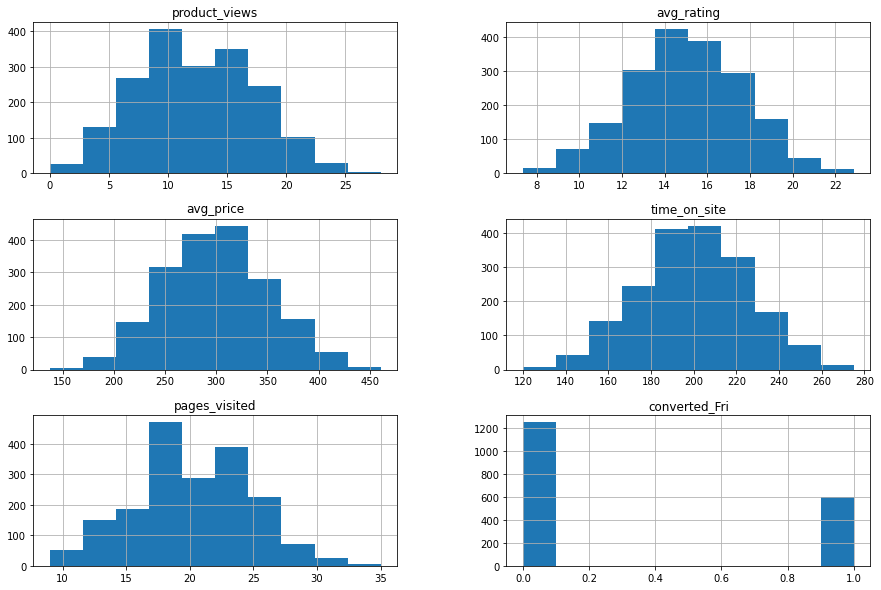

In [426]:
df2.hist(figsize=(15,10))
plt.show()

(0.0, 1.0, 0.0, 1.0)

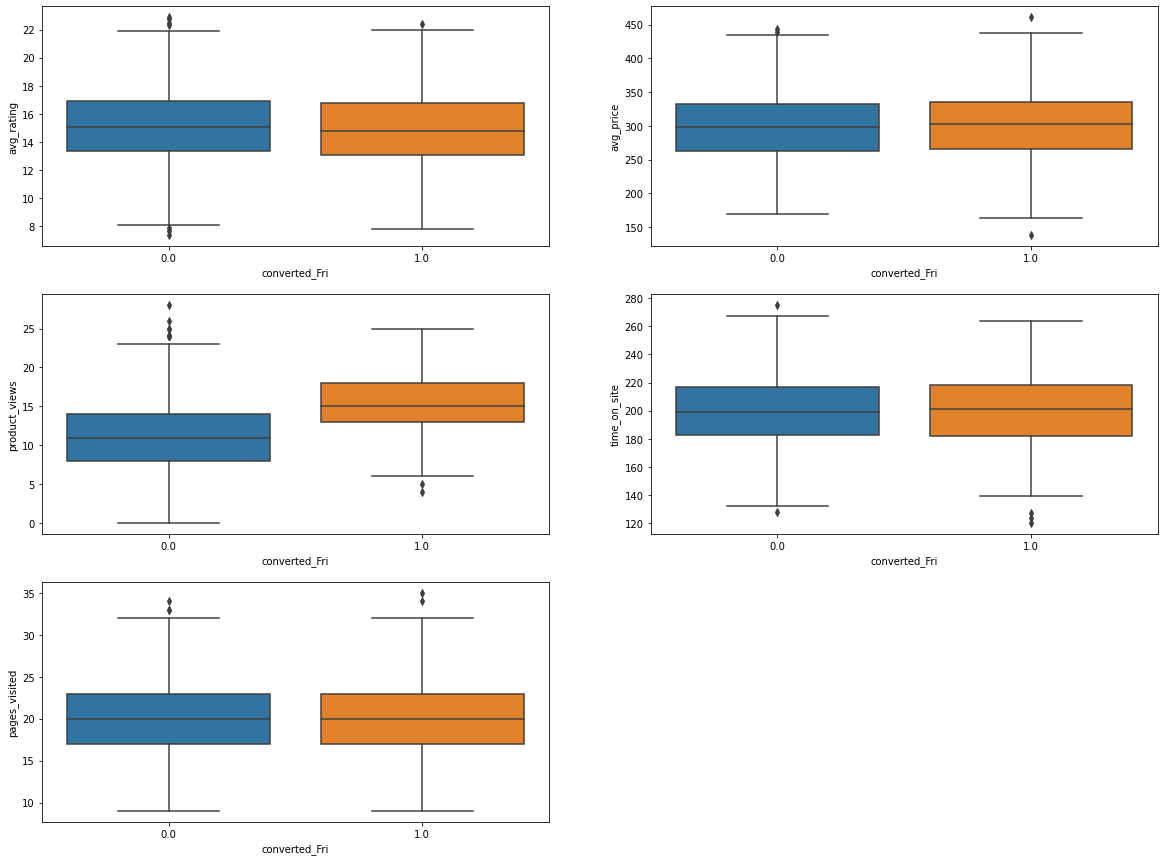

In [427]:
fig, ((ax1, ax2,), (ax3, ax4), (ax5, _)) = plt.subplots(3,2, figsize=(20,15))

sns.boxplot(x='converted_Fri',y='avg_rating', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_price', data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='product_views', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='time_on_site', data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='pages_visited', data=df2, ax=ax5)

_.axis('off')

* Deal with Outliers

In [428]:
df2_product_views_outliers1 = df2[df2['product_views'] > 21].index
df2_product_views_outliers2 = df2[df2['product_views'] <= 5].index

In [429]:
df2 = df2.drop(df2_product_views_outliers1)
df2 = df2.drop(df2_product_views_outliers2)

(0.0, 1.0, 0.0, 1.0)

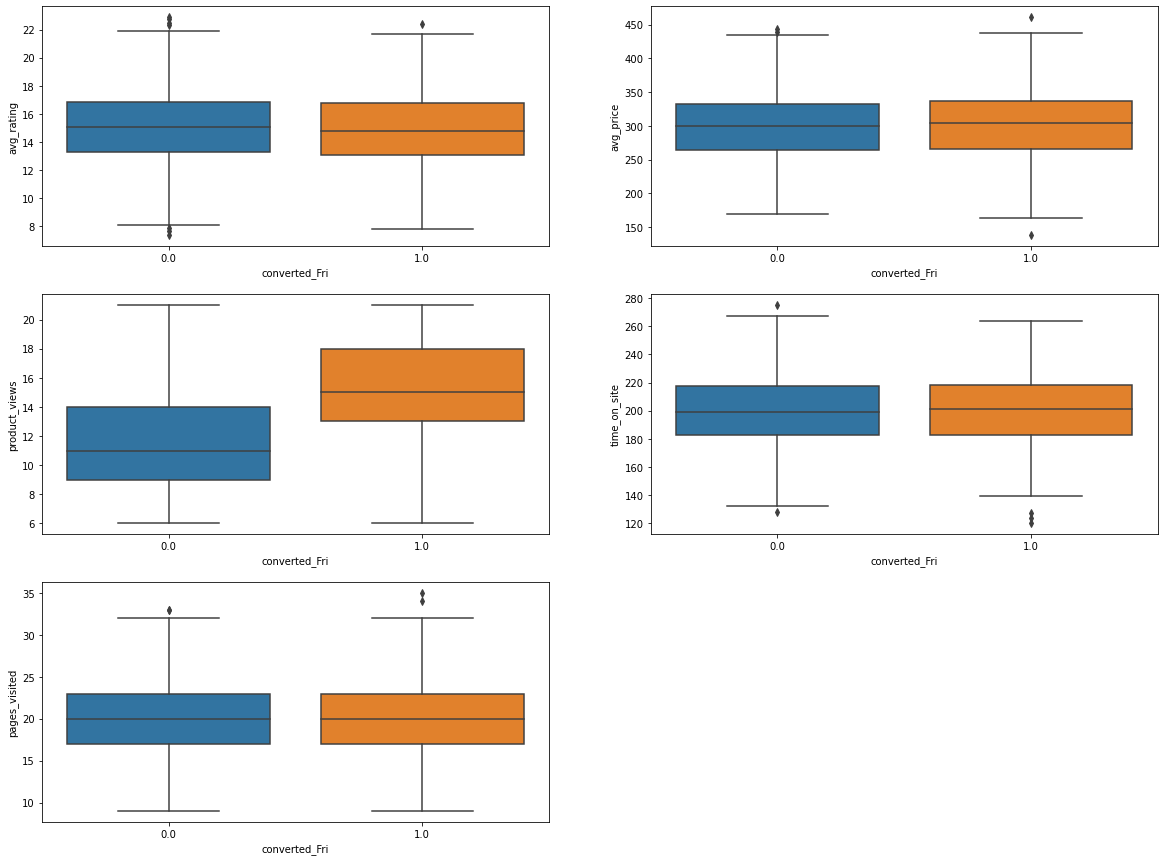

In [430]:
fig, ((ax1, ax2,), (ax3, ax4), (ax5, _)) = plt.subplots(3,2, figsize=(20,15))

sns.boxplot(x='converted_Fri',y='avg_rating', data=df2, ax=ax1)
sns.boxplot(x='converted_Fri',y='avg_price', data=df2, ax=ax2)
sns.boxplot(x='converted_Fri',y='product_views', data=df2, ax=ax3)
sns.boxplot(x='converted_Fri',y='time_on_site', data=df2, ax=ax4)
sns.boxplot(x='converted_Fri',y='pages_visited', data=df2, ax=ax5)

_.axis('off')

### 4. Feature Engineering

##### 4.1 Transformation

* Covert numerical variables to categorical variables

In [431]:
df2.nunique()

visitor_location        5
marketing_channel       5
gender                  2
product_views          16
avg_rating           1073
avg_price            1603
time_on_site          137
pages_visited          27
converted_Fri           2
dtype: int64

In [432]:
df2['product_views'].value_counts()

product_views
13.0    156
12.0    145
11.0    144
10.0    138
14.0    132
9.0     123
15.0    119
16.0    100
8.0      99
7.0      95
17.0     95
18.0     94
6.0      74
19.0     56
20.0     48
21.0     34
Name: count, dtype: int64

In [433]:
def product_views(x):
    if x >= 0 and x < 12:
        return 'low_product_views'
    elif x >= 12:
        return "high_product_views"

df2['product_views'] = df2['product_views'].apply(product_views)

product_views_counts = df2['product_views'].value_counts()

print(product_views_counts)

product_views
high_product_views    979
low_product_views     673
Name: count, dtype: int64


In [434]:
df2['time_on_site'].value_counts()

time_on_site
208.0    32
202.0    31
198.0    31
199.0    29
183.0    29
         ..
135.0     1
265.0     1
136.0     1
120.0     1
256.0     1
Name: count, Length: 137, dtype: int64

In [435]:
def time_on_site(x):
    if x >= 0 and x < 200:
        return 'low_time_on_site'
    elif x >= 200:
        return "high_time_on_site"

df2['time_on_site'] = df2['time_on_site'].apply(time_on_site)

time_on_site_counts = df2['time_on_site'].value_counts()

print(time_on_site_counts)

time_on_site
high_time_on_site    835
low_time_on_site     817
Name: count, dtype: int64


In [437]:
df2['pages_visited'].value_counts()

pages_visited
18.0    148
17.0    142
20.0    133
19.0    133
21.0    128
23.0    126
22.0    119
24.0     99
25.0     84
16.0     81
15.0     78
26.0     73
14.0     59
27.0     41
28.0     40
13.0     38
12.0     33
11.0     24
29.0     21
10.0     16
30.0     15
9.0       6
32.0      6
31.0      5
33.0      2
35.0      1
34.0      1
Name: count, dtype: int64

In [438]:
def pages_visited (x):
    if x >= 0 and x < 20:
        return 'low_pages_visited'
    elif x >= 20:
        return "high_pages_visited"

df2['pages_visited'] = df2['pages_visited'].apply(pages_visited)

pages_visited_counts = df2['pages_visited'].value_counts()

print(pages_visited_counts)

pages_visited
high_pages_visited    894
low_pages_visited     758
Name: count, dtype: int64


##### 4.2 Feature Selection

### 5. Model Development

* Categorical Variables

** 'visitor_location', 'marketing_channel', 'gender', 'product_views', 'time_on_site','pages_visited'

* Numerical Variables

** 'avg_rating', 'avg_price'

In [439]:
cat = ['visitor_location', 'marketing_channel', 'gender', 'product_views', 'time_on_site','pages_visited']
num = ['avg_rating', 'avg_price']


* Build Pipeline

In [440]:
cat_transformer = OneHotEncoder(handle_unknown='ignore')
num_transformer = StandardScaler()
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat),
                                                 ('num', num_transformer, num)])

* Split training and testing sets

In [442]:
X_train, X_test, y_train, y_test = train_test_split(df2[cat+num], df2['converted_Fri'], test_size=0.3, random_state=1)

In [443]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [444]:
X_train_transformed.shape

(1156, 20)

##### 5.1 Logistic Regression

In [445]:
log = LogisticRegression(max_iter=1000)

log_reg = log.fit(X_train_transformed, y_train)
y_pred_log = log.predict(X_test_transformed)

In [446]:
cv_scores_log = cross_val_score(log, X_train_transformed, y_train, cv=10, scoring='f1')
print(f"Cross-validation scores for logistic regression: {round(cv_scores_log.mean(), 3)}.")

Cross-validation scores for logistic regression: 0.493.


In [447]:
matrix_log = confusion_matrix(y_test, y_pred_log)
matrix_log

array([[259,  45],
       [108,  84]], dtype=int64)

In [448]:
accuracy_log = round(accuracy_score(y_test, y_pred_log), 3)
recall_log = round(recall_score(y_test, y_pred_log), 3)
precision_log = round(precision_score(y_test, y_pred_log), 3)
f1_log = round(f1_score(y_test, y_pred_log,), 3)

print(f"The accuracy of logistic regression is {accuracy_log}.")
print(f"The recall of logistic regression is {recall_log}.")
print(f"The precission of logistic regression is {precision_log}.")
print(f"The f1 of logistic regression is {f1_log}.")

The accuracy of logistic regression is 0.692.
The recall of logistic regression is 0.438.
The precission of logistic regression is 0.651.
The f1 of logistic regression is 0.523.


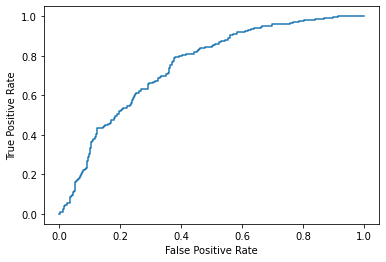

In [449]:
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, log.predict_proba(X_test_transformed)[:,1])

plt.plot(fpr_log,tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [450]:
gmeans_log = np.sqrt(tpr_log*(1-fpr_log))
gmeans_log

array([0.        , 0.        , 0.10189407, 0.10138839, 0.16030912,
       0.16004171, 0.20243853, 0.20209972, 0.21435913, 0.21363859,
       0.23618635, 0.23498641, 0.28340427, 0.28292024, 0.2916275 ,
       0.29112771, 0.29956795, 0.29905278, 0.32301392, 0.32245652,
       0.33004477, 0.32947326, 0.39110168, 0.3904221 , 0.39666925,
       0.39597758, 0.40211714, 0.40141352, 0.40745015, 0.4067347 ,
       0.41267274, 0.41194557, 0.42355194, 0.42280295, 0.43407968,
       0.43330935, 0.44428094, 0.4434897 , 0.45417773, 0.45255276,
       0.45778476, 0.45696066, 0.46212423, 0.46128931, 0.49107997,
       0.49018953, 0.50904982, 0.50812343, 0.52179735, 0.5208443 ,
       0.54712165, 0.54611868, 0.57114459, 0.57009372, 0.57415138,
       0.57309108, 0.58110673, 0.57895048, 0.58682772, 0.58573187,
       0.59733165, 0.596212  , 0.61502456, 0.60804863, 0.61170061,
       0.61052313, 0.61414644, 0.61295968, 0.61655478, 0.61295968,
       0.6165131 , 0.61409064, 0.61760982, 0.61638804, 0.62680

In [451]:
thresholds_log[np.argmax(gmeans_log)]

0.32601996285224993

##### 5.2 Gaussian Naive Bayes

In [452]:
nb = GaussianNB()

nb_model = nb.fit(X_train_transformed, y_train)
y_pred_nb = nb.predict(X_test_transformed)

In [454]:
# Cross-validation for NB
cv_scores_nb = cross_val_score(nb, X_train_transformed, y_train, cv=10, scoring='f1')

print(f"Cross-validation scores for Naive Bayes: {round(cv_scores_nb.mean(), 3)}.")

Cross-validation scores for Naive Bayes: 0.561.


In [455]:
accuracy_nb = round(accuracy_score(y_test, y_pred_nb), 3)
recall_nb = round(recall_score(y_test, y_pred_nb), 3)
precision_nb = round(precision_score(y_test, y_pred_nb), 3)
f1_nb = round(f1_score(y_test, y_pred_nb), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_nb}.")
print(f"The recall of Gaussian Naive Bayes is {recall_nb}.")
print(f"The precission of Gaussian Naive Bayes is {precision_nb}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_nb}.")

The accuracy of Gaussian Naive Bayes is 0.692.
The recall of Gaussian Naive Bayes is 0.641.
The precission of Gaussian Naive Bayes is 0.594.
The f1 of Gaussian Naive Bayes is 0.617.


In [457]:
# Hyperparameter tuning
params_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
gridsearch_nb = GridSearchCV(nb, params_nb, cv=10, scoring='f1')

nb_grid = gridsearch_nb.fit(X_train_transformed, y_train)

print("Best parameters for Gaussian Naive Bayes: ", gridsearch_nb.best_params_)

Best parameters for Gaussian Naive Bayes:  {'var_smoothing': 0.002848035868435802}


In [458]:
nb_best = GaussianNB(**gridsearch_nb.best_params_)

# Fit the models with the best parameters
nb_best_model = nb_best.fit(X_train_transformed, y_train)
y_pred_nb_best = nb_best.predict(X_test_transformed)

In [459]:
matrix_nb = confusion_matrix(y_test, y_pred_nb_best)
matrix_nb

array([[220,  84],
       [ 69, 123]], dtype=int64)

In [461]:
# Cross-validation for NB
cv_scores_nb_best = cross_val_score(nb_best, X_train_transformed, y_train, cv=10, scoring='f1')
print(f"Cross-validation scores for Gaussian Naive Bayes: {round(cv_scores_nb_best.mean(), 3)}.")


accuracy_nb_best = round(accuracy_score(y_test, y_pred_nb_best), 3)
recall_nb_best = round(recall_score(y_test, y_pred_nb_best), 3)
precision_nb_best = round(precision_score(y_test, y_pred_nb_best), 3)
f1_nb_best = round(f1_score(y_test, y_pred_nb_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_nb_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_nb_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_nb_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_nb_best}.")

Cross-validation scores for Gaussian Naive Bayes: 0.562.
The accuracy of Gaussian Naive Bayes is 0.692.
The recall of Gaussian Naive Bayes is 0.641.
The precission of Gaussian Naive Bayes is 0.594.
The f1 of Gaussian Naive Bayes is 0.617.


In [462]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb_best.predict_proba(X_test_transformed)[:,1])

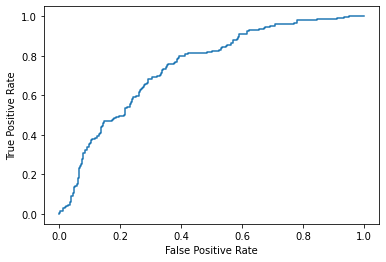

In [463]:
plt.plot(fpr_nb,tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [464]:
gmeans_nb = np.sqrt(tpr_nb*(1-fpr_nb))
gmeans_nb

array([0.        , 0.07216878, 0.07204999, 0.12479424, 0.12417491,
       0.17560984, 0.17502349, 0.18904698, 0.18872952, 0.20176035,
       0.20107987, 0.21327741, 0.21255321, 0.2454353 , 0.24501611,
       0.2916275 , 0.29062706, 0.31522931, 0.31468534, 0.35879649,
       0.3581752 , 0.3649982 , 0.36372863, 0.37695943, 0.37629983,
       0.41339864, 0.41267274, 0.46792691, 0.46710237, 0.47736958,
       0.47652542, 0.48156816, 0.48071356, 0.50513061, 0.504231  ,
       0.53200733, 0.5301039 , 0.54341402, 0.54145576, 0.55440076,
       0.5523884 , 0.56499204, 0.56396009, 0.56809172, 0.56705031,
       0.57924633, 0.57818056, 0.58218186, 0.57895048, 0.58290241,
       0.58072333, 0.58851862, 0.58630197, 0.59396637, 0.59284037,
       0.59662853, 0.59549317, 0.61404879, 0.61287582, 0.6165131 ,
       0.61533091, 0.62609553, 0.62489034, 0.63195147, 0.62211505,
       0.6255617 , 0.62431432, 0.62773524, 0.62647851, 0.62987409,
       0.62733937, 0.63070315, 0.62686126, 0.63018681, 0.62369

In [465]:
thresholds_nb[np.argmax(gmeans_nb)]

0.32796077370482773

##### 5.3 KNeighborsClassifier

In [466]:
knn = KNeighborsClassifier(n_neighbors=5)

knn_model = knn.fit(X_train_transformed, y_train)
y_pred_knn = knn.predict(X_test_transformed)

In [467]:
# Cross-validation for KNeighborsClassifier
cv_scores_knn = cross_val_score(knn, X_train_transformed, y_train, cv=10, scoring='f1')

print(f"Cross-validation scores for Naive Bayes: {round(cv_scores_knn.mean(), 3)}.")

Cross-validation scores for Naive Bayes: 0.438.


In [469]:
accuracy_knn = round(accuracy_score(y_test, y_pred_knn), 3)
recall_knn = round(recall_score(y_test, y_pred_knn), 3)
precision_knn = round(precision_score(y_test, y_pred_knn), 3)
f1_knn = round(f1_score(y_test, y_pred_knn), 3)

print(f"The accuracy of KNeighborsClassifier is {accuracy_knn}.")
print(f"The recall of KNeighborsClassifier is {recall_knn}.")
print(f"The precission of KNeighborsClassifier is {precision_knn}.")
print(f"The f1 of KNeighborsClassifier is {f1_knn}.")

The accuracy of KNeighborsClassifier is 0.651.
The recall of KNeighborsClassifier is 0.406.
The precission of KNeighborsClassifier is 0.569.
The f1 of KNeighborsClassifier is 0.474.


In [470]:
# Hyperparameter tuning
params_knn = {'n_neighbors': list(range(1,100)), 'weights': ['uniform', 'distance']}
randomsearch_knn = RandomizedSearchCV(knn, params_knn, cv=10, scoring='f1')

rs_knn = randomsearch_knn.fit(X_train_transformed, y_train)

print("Best parameters for KNN: ", randomsearch_knn.best_params_)

Best parameters for KNN:  {'weights': 'distance', 'n_neighbors': 18}


In [471]:
knn_best = KNeighborsClassifier(**randomsearch_knn.best_params_)

# Fit the model with the best parameters
knn_best_model = knn_best.fit(X_train_transformed, y_train)
y_pred_knn_best = knn_best.predict(X_test_transformed)

In [472]:
matrix_knn = confusion_matrix(y_test, y_pred_knn_best)
matrix_knn

array([[255,  49],
       [136,  56]], dtype=int64)

In [473]:
# Cross-validation for KNeighborsClassifier
cv_scores_knn_best = cross_val_score(knn_best, X_train_transformed, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validation scores for KNeighborsClassifier: {round(cv_scores_knn_best.mean(), 3)}.")


accuracy_knn_best = round(accuracy_score(y_test, y_pred_knn_best), 3)
recall_knn_best = round(recall_score(y_test, y_pred_knn_best), 3)
precision_knn_best = round(precision_score(y_test, y_pred_knn_best), 3)
f1_knn_best = round(f1_score(y_test, y_pred_knn_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_knn_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_knn_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_knn_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_knn_best}.")

Cross-validation scores for KNeighborsClassifier: 0.705.
The accuracy of Gaussian Naive Bayes is 0.627.
The recall of Gaussian Naive Bayes is 0.292.
The precission of Gaussian Naive Bayes is 0.533.
The f1 of Gaussian Naive Bayes is 0.377.


In [474]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn_best.predict_proba(X_test_transformed)[:,1])

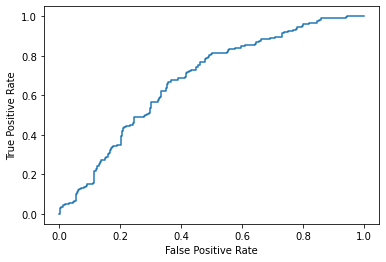

In [475]:
plt.plot(fpr_knn,tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [476]:
gmeans_knn = np.sqrt(tpr_knn*(1-fpr_knn))
gmeans_knn

array([0.        , 0.        , 0.1764857 , 0.17619423, 0.19031152,
       0.18968031, 0.21507725, 0.21435913, 0.22595436, 0.22443276,
       0.23538707, 0.23378031, 0.24417557, 0.24375422, 0.25370743,
       0.25282803, 0.30565418, 0.30512122, 0.3207785 , 0.32021721,
       0.33511892, 0.33453047, 0.3417255 , 0.34052011, 0.34754189,
       0.34568832, 0.35253429, 0.35126846, 0.35795989, 0.35731316,
       0.37031059, 0.36626336, 0.37252473, 0.37183422, 0.43996019,
       0.4383216 , 0.44863646, 0.44779553, 0.46280958, 0.46106641,
       0.46594556, 0.46506225, 0.47465217, 0.47374893, 0.48313101,
       0.4794288 , 0.4885616 , 0.48761385, 0.49210809, 0.49018953,
       0.50338084, 0.50239285, 0.50670531, 0.50570688, 0.51840442,
       0.5173789 , 0.52565748, 0.52461348, 0.52869613, 0.5276419 ,
       0.53168519, 0.52741456, 0.5313951 , 0.52705711, 0.5613414 ,
       0.5601804 , 0.57831389, 0.57711282, 0.58419423, 0.58297589,
       0.58647727, 0.58401824, 0.58748425, 0.58375416, 0.58717

In [477]:
thresholds_knn[np.argmax(gmeans_knn)]

0.3450434003584442

##### 5.4 RandomForestClassifier

In [478]:
rfc = RandomForestClassifier(random_state=1)

rfc_model = rfc.fit(X_train_transformed, y_train)
y_pred_rfc = rfc.predict(X_test_transformed)

In [479]:
# Cross-validation for RandomForestClassifier
cv_scores_rfc = cross_val_score(rfc, X_train_transformed, y_train, cv=10, scoring='f1')

print(f"Cross-validation scores for RandomForestClassifier: {round(cv_scores_rfc.mean(), 3)}.")

Cross-validation scores for RandomForestClassifier: 0.417.


In [480]:
accuracy_rfc = round(accuracy_score(y_test, y_pred_rfc), 3)
recall_rfc = round(recall_score(y_test, y_pred_rfc), 3)
precision_rfc = round(precision_score(y_test, y_pred_rfc), 3)
f1_rfc = round(f1_score(y_test, y_pred_rfc), 3)

print(f"The accuracy of RandomForestClassifier is {accuracy_knn}.")
print(f"The recall of RandomForestClassifier is {recall_knn}.")
print(f"The precission of RandomForestClassifier is {precision_knn}.")
print(f"The f1 of RandomForestClassifier is {f1_knn}.")

The accuracy of RandomForestClassifier is 0.651.
The recall of RandomForestClassifier is 0.406.
The precission of RandomForestClassifier is 0.569.
The f1 of RandomForestClassifier is 0.474.


In [481]:
params_rfc = {"n_estimators": [200, 225, 275, 300], "max_depth": [None, 5, 10]}
gridsearch_rfc = GridSearchCV(rfc, params_rfc, cv=5, scoring='roc_auc')

grid_rfc = gridsearch_rfc.fit(X_train_transformed, y_train)

print("Best parameters for KNeighborsClassifier: ", gridsearch_rfc.best_params_)

Best parameters for KNeighborsClassifier:  {'max_depth': 5, 'n_estimators': 275}


In [482]:
# Hyperparameter tuning
rfc_best = RandomForestClassifier(**gridsearch_rfc.best_params_)

# Fit the models with the best parameters
rfc_best_model = rfc_best.fit(X_train_transformed, y_train)
y_pred_rfc_best = nb_best.predict(X_test_transformed)

In [484]:
matrix_rfc = confusion_matrix(y_test, y_pred_rfc_best)
matrix_rfc

array([[220,  84],
       [ 69, 123]], dtype=int64)

In [485]:
# Cross-validation for RandomForestClassifier
cv_scores_rfc_best = cross_val_score(rfc_best, X_train_transformed, y_train, cv=5, scoring='f1')
print(f"Cross-validation scores for KNeighborsClassifier: {round(cv_scores_rfc_best.mean(), 3)}.")


accuracy_rfc_best = round(accuracy_score(y_test, y_pred_rfc_best), 3)
recall_rfc_best = round(recall_score(y_test, y_pred_rfc_best), 3)
precision_rfc_best = round(precision_score(y_test, y_pred_rfc_best), 3)
f1_rfc_best = round(f1_score(y_test, y_pred_rfc_best), 3)

print(f"The accuracy of Gaussian Naive Bayes is {accuracy_rfc_best}.")
print(f"The recall of Gaussian Naive Bayes is {recall_rfc_best}.")
print(f"The precission of Gaussian Naive Bayes is {precision_rfc_best}.")
print(f"The f1 of Gaussian Naive Bayes is {f1_rfc_best}.")

Cross-validation scores for KNeighborsClassifier: 0.434.
The accuracy of Gaussian Naive Bayes is 0.692.
The recall of Gaussian Naive Bayes is 0.641.
The precission of Gaussian Naive Bayes is 0.594.
The f1 of Gaussian Naive Bayes is 0.617.


In [487]:
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test, rfc_best.predict_proba(X_test_transformed)[:,1])

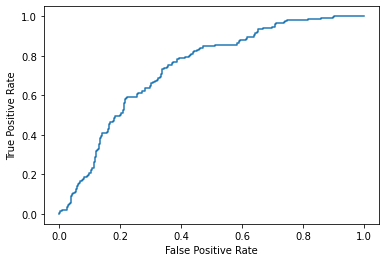

In [488]:
plt.plot(fpr_rfc,tpr_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [489]:
gmeans_rfc = np.sqrt(tpr_rfc*(1-fpr_rfc))
gmeans_rfc

array([0.        , 0.07216878, 0.07204999, 0.12479424, 0.12438169,
       0.14362361, 0.14242573, 0.18841153, 0.188093  , 0.21327741,
       0.21291562, 0.22443276, 0.22405075, 0.23498641, 0.23458507,
       0.2916275 , 0.29112771, 0.30777681, 0.30724753, 0.31522931,
       0.31414043, 0.32189815, 0.32133882, 0.34352564, 0.34292665,
       0.36372863, 0.36309219, 0.37629983, 0.37563908, 0.38206072,
       0.38138749, 0.3938953 , 0.39250098, 0.39858663, 0.39787677,
       0.40386021, 0.40313839, 0.41482598, 0.4125897 , 0.41828086,
       0.41752242, 0.423127  , 0.42235698, 0.43332912, 0.43174473,
       0.44764246, 0.44681883, 0.45709187, 0.45540206, 0.48003592,
       0.47914283, 0.50252924, 0.50159081, 0.52824226, 0.52725211,
       0.53155628, 0.53055618, 0.53481774, 0.5338077 , 0.55458614,
       0.55353479, 0.57743929, 0.57634045, 0.58407691, 0.58296119,
       0.59435565, 0.58863506, 0.59234888, 0.59119081, 0.59853508,
       0.59736033, 0.61530307, 0.61409064, 0.62110905, 0.61741

In [490]:
thresholds_rfc[np.argmax(gmeans_rfc)]

0.3670395732075005

### 6. Model Evaluation Accuracy

In [491]:
data = {'Model': ['LogisticRegression', 'Gaussian Naive Bayes', 'KNeighborsClassifier', 'RandomForestClassifier'],
        'Accuracy': [accuracy_log, accuracy_nb_best, accuracy_knn_best, accuracy_rfc_best],
        'Recall': [recall_log, recall_nb_best, recall_knn_best, recall_rfc_best],
        'Precision': [precision_log, precision_nb_best, precision_knn_best, precision_rfc_best],
        'F1': [f1_log, f1_nb_best, f1_knn_best, f1_rfc_best]}

results = pd.DataFrame(data)
results

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression,0.692,0.438,0.651,0.523
1,Gaussian Naive Bayes,0.692,0.641,0.594,0.617
2,KNeighborsClassifier,0.627,0.292,0.533,0.377
3,RandomForestClassifier,0.692,0.641,0.594,0.617


##### 6.1 ROC Curve

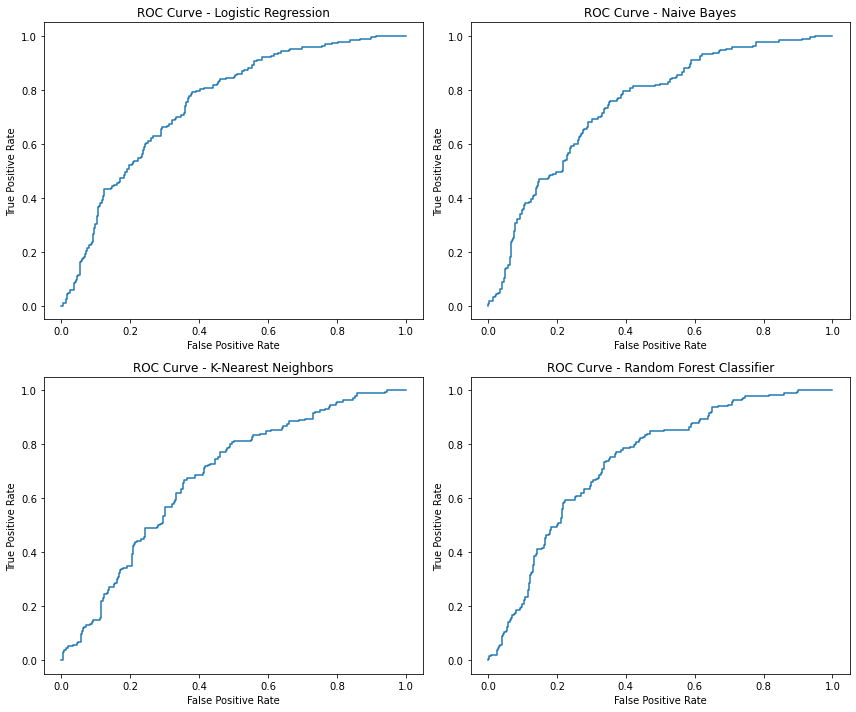

In [492]:
plt.figure(figsize=(12, 10))

# Plot ROC curve for Logistic Regression
plt.subplot(2, 2, 1)
plt.plot(fpr_log, tpr_log)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')

# Plot ROC curve for Naive Bayes
plt.subplot(2, 2, 2)
plt.plot(fpr_nb, tpr_nb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')

# Plot ROC curve for K-Nearest Neighbors
plt.subplot(2, 2, 3)
plt.plot(fpr_knn, tpr_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors')

# Plot ROC curve for Random Forest Classifier
plt.subplot(2, 2, 4)
plt.plot(fpr_rfc, tpr_rfc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### 7. Conclusion

**From above results, KNeighborsClassifier has the highest accuracy, recall, precision, and f1 scores; and the best roc curve. Therefore, we choose KNeighborsClassifier.**